# A/B Testing with Cookie Cats Game

A lot of things come to mind when we hear the name Cookie Cats, and probably is not what we think since is hard to associate both words, it’s about meow-sicians (Belle, Ziggy, Smokey, Rita, Berry).

Anyway, Cookie Cats is a mobile puzzle game of “connect-three”-style developed by Tactile Entertainment, a mobile games developer from Copenhagen. To be in context, this game’s main objective is to align 3 cookies of the same kind to feed a cat, and in this way finish each level. Also as collectible credit, you can earn Keys to unlock gates located at certain levels.

In this project, in order to embrace the actual problem that the stakeholders are facing, we are going to make use of Tactical Analytics, which is a branch of user-oriented game analytics, with the purpose to “aim to inform game design at the short-term, for example, an A/B test of a new game feature” (A. Dranchen, 2013).

Knowing this we can notice that the applicability of statistics in new fields can be considered one of the greatest advances for the game industry. Nowadays, human-machine interactions are being monitored, in a good way in most cases. The main purpose is not just to increase the company's revenue, one of the main objectives is to give a benefit in terms of User Experience (UX) and Engagement, and this can be covered using Data Science.

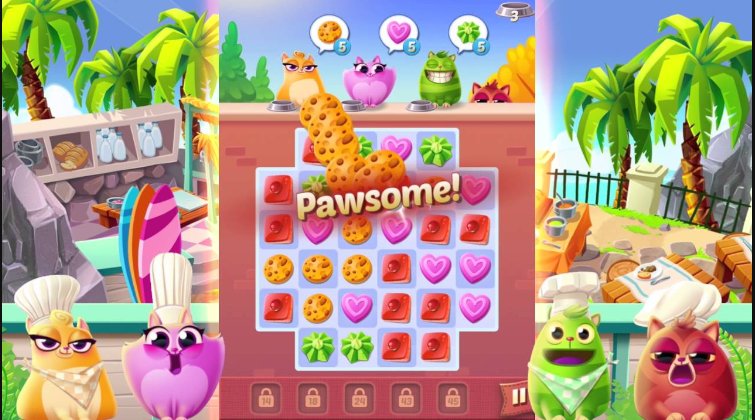


https://www.youtube.com/watch?v=GaP5f0jVTWE

# ⚠️ Introduction to problem

Hypothesis

According to Rasmus Baath, Data Science Lead at castle.io, Tactile Entertainment is planning to move Cookie Cats' time gates from level 30 to 40, but they don’t know by how much the user retention can be impacted by this decision.

This sort of “time gate” is usually seen in free-to-play models, and normally contains ads that can be skipped in exchange for in-game purchases. In this case the player requires to submit a specific number of ‘Keys’, which also can be skipped in exchange of in-game purchases.

So seeing this viewpoint, a decision like this can impact not only user retention, the expected revenue as well that’s why we are going to set the initial hypothesis as:

    Moving the Time Gate from Level 30 to Level 40 will decrease our user retention.
    Moving the Time Gate from Level 30 to Level 40 will increase our user retention.

**Potential Stakeholders**
- Mobile Designer & User Retention Expert: They must be aligned with the final statement of the analyst, and make a final judgment to improve user retention.
- Level Designer: As the scene of levels is under study, the level designers need to take action on time to guarantee the storyline of the levels has a correct sequence, and to add it in a new patch.
- System Designer & System Engineer: If we extend the time gate, the credits should or should not remain at the same quantity required, which also needs to be implemented in the tracking system of the user progress.
- Executive Game Producer: As we mentioned before, a potential change requires a redesign of the earnings strategy and an alignment in the business expectation like funding, agreements, marketing, and patching deadlines.
- Players community: This stakeholder can be affected by the theory of hedonic adaptation, which is according to Rasmus Baath is “the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously”, meaning that if we prolong the time gate, this can affect the engagement in an unfavorable way, which in this case require an evaluation.
Note: To facilitate the understanding of the roles of the development team, I invite you to take a look at this diagram that I designed.

# 📥 About the data

**Collection process and structure**

Most of the time game developers work aside of telemetry systems, which according to Anders Drachen et al. (one of the pioneers in the Game Analytics field), from an interview made with Georg Zoeller of Ubisoft Singapore, the Game Industry manages two kinds of telemetry systems:

- Developer-facing: “The main goal of the system is to facilitate and improve the production process, gathering and presenting information about how developers and testers interact with the unfinished game”. Like the one mentioned in Chapter 7 of the “Game Analytics Maximizing the Value of Player Data” book, like the one implemented in Bioware’s production process of Dragon Age: Origins in 2009.
- User-facing: This one is “collected after a game is launched and mainly aimed at tracking, analyzing, and visualizing player behavior” mentioned in Chapters 4, 5, and 6 of the same book.
With the help of this kind of data-fetching system, we can create a responsive gate between the Data Analysts and the Designers. In most cases, these systems collect the data in form of logs (.txt) or dictionaries (.json), but fortunately in this case we will count with a structured CSV file.


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [16]:
df = pd.read_csv('D:/загрузки/cookie_cats.csv')
df.head()

userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True

This dataset contains around 90,189 records of players that started the game while the telemetry system was running, according to Rasmus Baath. Among the variables collected are the next:

    userid : unique identification of the user.

    version : the group in which the players were measured, for a time gate at level 30 it contains a string called gate_30, or for a time gate at level 40 it contains a string called gate_40.

    sum_gamerounds : number of game rounds played within the first 14 days since the first session played.

    retention_1 : Boolean that defines if the player came back 1 day after the installation.

    retention_7 : Boolean that defines if the player came back 7 days after the installation.

*Note*: An important fact to keep in mind is that in the game industry one crucial metric is retention_1, since it defines if the game generate a first engagement with the first log-in of the player.

# 🔧 Data Preprocessing
Before starting the analysis we need to do some validations on the dataset.

In [8]:
print("Number of players: ", df.userid.nunique(), '\n',
    "Number of records: ", len(df))

Number of players:  90189 
 Number of records:  90189


It’s not common to find this kind of data, cause as we saw the data is almost ideally sampled, where we count just with distinct records.

In [10]:
df.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [13]:
df.isna().sum() # Null values not found

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [20]:
df['sum_gamerounds'].describe(include = 'all')

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


C:\Users\User\AppData\Local\Temp\ipykernel_14424\3557114934.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\User\AppData\Local\Temp\ipykernel_14424\3557114934.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




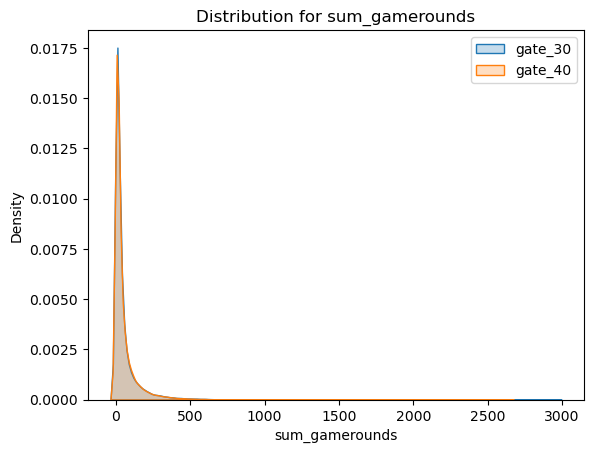

In [46]:
numerical_features_for_gate_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
numerical_features_for_gate_40 = df[df['version'] == 'gate_40']['sum_gamerounds']
categorical_features = ['version', 'retention_1', 'retention_7']
numerical_features = ['sum_gamerounds']

sns.kdeplot(data = numerical_features_for_gate_30, label = 'gate_30', shade = True)
sns.kdeplot(data = numerical_features_for_gate_40, label = 'gate_40', shade = True)
plt.title('Distribution for sum_gamerounds')
plt.legend()
plt.show()

The advantages of log plots include:

- Reduced Range of Values: Logarithmic plots can help reduce the range of values of variables, especially if they exhibit exponential growth. This allows for better visualization of the data and identification of distribution characteristics.

- Highlighting Small Details: Logarithmic plots emphasize small details and differences in data, particularly in areas with low data density, which might be lost on linear plots.

- Normalization of Distribution: If the data follows a log-normal distribution, logarithmic scale can make it more normal, simplifying analysis and statistical tests.

- Detection of Trends and Patterns: Logarithmic plots can reveal linear trends in data that may not be obvious on linear plots. This can be useful in identifying patterns or changes in the data.

- Improved Visual Interpretation: Logarithmic plots can enhance data perception, especially for audiences with less experience in data analysis, as they help make large scale changes more understandable and accessible.

d:\anaconda3\envs\torch\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_14424\2898608478.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=log_numerical_features_for_gate_30, label='gate_30', shade=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14424\2898608478.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=log_numerical_features_for_gate_40, label='gate_40', shade=True)


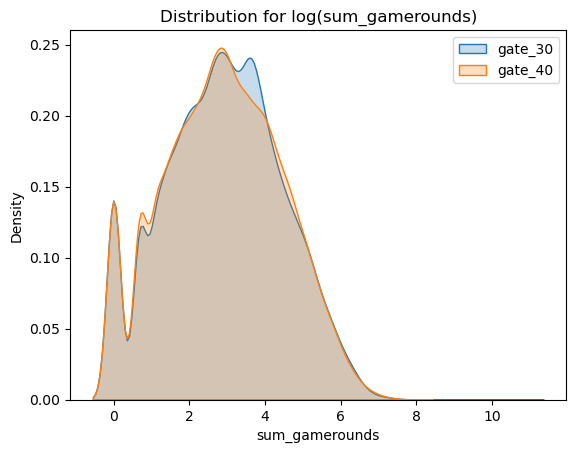

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Применяем логарифмическую функцию к числовым данным для каждой группы
log_numerical_features_for_gate_30 = np.log(df[df['version'] == 'gate_30']['sum_gamerounds'])
log_numerical_features_for_gate_40 = np.log(df[df['version'] == 'gate_40']['sum_gamerounds'])

# Строим графики с использованием логарифмических данных
sns.kdeplot(data=log_numerical_features_for_gate_30, label='gate_30', shade=True)
sns.kdeplot(data=log_numerical_features_for_gate_40, label='gate_40', shade=True)
plt.title('Distribution for log(sum_gamerounds)')
plt.legend()
plt.show()


In [32]:
# !pip install plotly

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.7 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.4/15.7 MB 3.3 MB/s eta 0:00:05
   - -------------------------------------- 0.7/15.7 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/15.7 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/15.7 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.6/15.7 MB 5.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.4/15.7 MB 6.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/15.7 MB 7.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.7 MB 8.2 MB/s eta 0:00:02
   ---------- ----------------------------- 4.3/15.7 MB 8.8 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/15.7 MB 8.8 MB/s eta 0:00:02
   ----------

In [36]:
import plotly.graph_objects as go

labels = ['Categorical Features', 'Numerical Features']
values = [len(categorical_features), len(numerical_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.05, 0], 
                             marker=dict(colors=colors, line=dict(color='#000000', width=2)))])

fig.show()


# 🔍 Exploratory Analysis & In-game interpretations
Summary statistics
We got the next conclusions about their distribution and measurement:

    userid
Interpretation: Player identifier with distinct records in the whole dataset which can be transformed as a factor.
Data type: Nominal
Measurement type: Discrete/String

    version
Interpretation: Just two possible values to evaluate, time gate at level 30 or level 40.
Data type: Ordinal
Measurement type: Discrete/String

    sum_gamerounds
Interpretation: Number of game rounds played by the user, where 50% of the users played between 5 and 51 sessions.
Data type: Numerical
Measurement type: Integer

    retention_1
Interpretation: Boolean measure to verify that the player retention was effective for 1 day at least.
Data type: Nominal
Measurement type: Discrete/String

    retention_7
Interpretation: Boolean measure to verify that the player retention was effective for 7 days at least.
Data type: Nominal
Measurement type: Discrete/String

**Strategy of Analysis**

The most accurate way to test changes is to perform A/B testing by targeting a specific variable, in the case retention (for 1 and 7 days after installation).

As we mentioned before, we have two groups in the version variable:

- Control group: The time gate is located at level 30. We are going to consider this one as a no-treatment group.
- Treatment group: The company plans to move the time gate to level 40. We are going to use this as a subject of study, due to the change involved.

In an advanced stage, we are going to perform a bootstrapping technique, to be confident about the result comparison for the retention probabilities between groups.

In [37]:
players_gate_30 = df[df['version'] == 'gate_30']['userid'].count()
players_gate_40 = df[df['version'] == 'gate_40']['userid'].count()

print('Number of players tested at gate 30: ', players_gate_30)
print('Number of players tested at gate 40: ', players_gate_40)

Number of players tested at gate 30:  44700
Number of players tested at gate 40:  45489


Game rounds distribution
As we see the proportion of players sampled for each group is balanced, so for now, only exploring the Game Rounds data is in the queue.

In [44]:
import plotly.express as px

# Define layout parameters
layout = {
    "height": 720,
    "width": 1000,
    "font": {"size": 15}
}

# Distribution Boxplot with outliers
box1 = px.box(df, x="sum_gamerounds", title="Game Rounds Overall Distribution by player", labels={"sum_gamerounds": "Game Rounds registered"})

# Update layout
box1.update_layout(**layout)

# Show plot
box1.show()


For now, we see that exist clear outliers in the dataset since one user has recorded 49,854 Game rounds played in less than 14 days, meanwhile, the max recorded, excluding the outlier, is around 2,900. The only response to this case situation is a “bot”, a “bug” or a “glitch”.

Nevertheless, it’s preferable to clean it, since only affected one record. Let’s prune it.

In [45]:
df = df[df['sum_gamerounds'] != 49854]

In [49]:
import plotly.graph_objects as go

# Import numpy library
import numpy as np

# ECDF Generator function
def ecdf(data):
    # Generate ECDF (Empirical Cumulative Distribution Function)
    # for one-dimensional arrays
    n = len(data)

    # X axis data
    x = np.sort(data)

     # Y axis data
    y = np.arange(1, n+1) / n

    return x, y

# Generate ECDF data
x_rounds, y_rounds = ecdf(df['sum_gamerounds'])

# Generate percentile markers 
percentiles = np.array([5, 25, 50, 75, 95])
ptiles = np.percentile(df['sum_gamerounds'], percentiles)

# Define layout parameters
layout = {
    "height": 720,
    "width": 1000,
    "font": {"size": 15},
    "title": 'Game Rounds Cumulative Distribution Plot',
    "yaxis_title": "Cumulative Probability"
}

# ECDF plot
ecdf = go.Figure()

# Add traces
ecdf.add_trace(go.Scatter(x=x_rounds, y=y_rounds,
                    mode='markers',
                    name='Game Rounds'))

ecdf.add_trace(go.Scatter(x=ptiles, y=percentiles/100,
                    mode='markers+text',
                    name='Percentiles',
                    marker=dict(line=dict(width=2), size=10),
                    text=percentiles,
                    textposition="bottom right"))

# Update layout
ecdf.update_layout(**layout)

# Show plot
ecdf.show()


In [50]:
print("Players inactive since installation: ", df[df["sum_gamerounds"] == 0].shape[0])

Players inactive since installation:  3994


And in most cases, players just play a couple of game rounds in their first two weeks. But, we are looking for players that like the game and to get hooked, that’s one of our interests.

A common metric in the video gaming industry for how fun and engaging a game is 1-day retention as we mentioned before.

Retention is the percentage of players that come back and plays the game one day after they have installed it. The higher 1-day retention is, the easier it is to retain players and build a large player base.

According to Anders Drachen et al. (2013), these customer kind metrics “are notably interesting to professionals working with marketing and management of games and game development”, also this metric is described simply as “how sticky the game is”, in other words, it’s essential.

As a first step, let’s look at what 1-day retention is overall.

In [53]:
retention_1 = df[df['retention_1'] == True]['userid'].count()/df['userid'].count() * 100
print("The overall retention for 1 day is: ", round(retention_1, 2 ),"%")

The overall retention for 1 day is:  44.52 %


# 🔃 1-day retention by A/B Group
Computing the retention individually, we have the next results.

In [117]:
# # Выборка игроков в каждой группе
# players_gate_30 = df[df['version'] == 'gate_30']
# players_gate_40 = df[df['version'] == 'gate_40']

# # Вывод количества игроков в каждой группе
# print('Количество игроков, протестированных на уровне 30: ', len(players_gate_30))
# print('Количество игроков, протестированных на уровне 40: ', len(players_gate_40))

# Вычисление удержания на 1 день для каждой группы
retention_1_for_group_30 = (players_gate_30['retention_1'].sum() / len(players_gate_30)) * 100
retention_1_for_group_40 = (players_gate_40['retention_1'].sum() / len(players_gate_40)) * 100

# Вывод результатов
print('Удержание Группы 30 на 1 день: ', round(retention_1_for_group_30, 2), "%")
print('Удержание Группы 40 на 1 день: ', round(retention_1_for_group_40, 2), "%")


Удержание Группы 30 на 1 день:  44.82 %
Удержание Группы 40 на 1 день:  44.23 %


It appears that there was a slight increase in 1-day retention when the gate was moved to level 40 (45.01%) compared to the control when it was at level 30 (44.82%).

For this reason, it’s important to consider bootstrapping techniques, this means “a sampling with replacement from observed data to estimate the variability in a statistic of interest”. In this case, retention, and we are going to do a function for that.

In [105]:
def bootstrap_replace_1day(df):
    results = []
    observed_retention = {
        'Group 30': 44.82,
        'Group 40': 44.23
    }
    for i in tqdm(range(1000)):
        bootstrap_sample = np.random.choice(df['retention_1'], size=len(df), replace=True)

        retention_30 = np.mean(bootstrap_sample[df['version'] == 'gate_30'])
        retention_40 = np.mean(bootstrap_sample[df['version'] == 'gate_40'])

        results.append({
            'Group 30': retention_30,
            'Group 40': retention_40
        })
    
    return results

bootstrap_results = bootstrap_replace_1day(df)


100%|██████████| 1000/1000 [00:16<00:00, 60.55it/s]


In [107]:
count = sum(1 for result in bootstrap_results if result['Group 40'] - result['Group 30'] > 0.59)

print("Number of times when the difference between group_30 & group_40 > 0.59:", count)


Number of times when the difference between group_30 & group_40 > 0.59: 0


In [108]:
import plotly.figure_factory as ff

# Средние значения удержания для группы 40 и группы 30
mean_g40 = np.mean([result['Group 40'] for result in bootstrap_results])
mean_g30 = np.mean([result['Group 30'] for result in bootstrap_results])

# Создание DataFrame для гистограммы
boot_1d = pd.DataFrame(data={'Gate 30': [result['Group 30'] for result in bootstrap_results],
                             'Gate 40': [result['Group 40'] for result in bootstrap_results]})

# Построение гистограммы
hist_1d = [boot_1d['Gate 30'], boot_1d['Gate 40']]
dist_1d = ff.create_distplot(hist_1d, group_labels=["Gate 30 (Control)", "Gate 40 (Treatment)"], show_rug=False, colors=['#3498DB', '#28B463'])

# Добавление вертикальных линий для средних значений и прямоугольника между ними
dist_1d.add_vline(x=mean_g40, line_width=3, line_dash="dash", line_color="#28B463")
dist_1d.add_vline(x=mean_g30, line_width=3, line_dash="dash", line_color="#3498DB")
dist_1d.add_vrect(x0=mean_g30, x1=mean_g40, line_width=0, fillcolor="#F1C40F", opacity=0.2)

# Обновление макета графика
dist_1d.update_layout(layout)
dist_1d.update_layout(xaxis_range=[0.43, 0.46])
dist_1d.update_layout(title='1-Day Retention Bootstrapping by A/B Group', xaxis_title="Retention")

# Отображение графика
dist_1d.show()


In [110]:
# Добавление столбца с процентным различием между двумя AB-группами
boot_1d['diff'] = ((boot_1d['Gate 30'] - boot_1d['Gate 40']) / boot_1d['Gate 40']) * 100

# Построение гистограммы процентного различия
hist_1d_diff = [boot_1d['diff']]
dist_1d_diff = ff.create_distplot(hist_1d_diff, show_rug=False, colors=['#F1C40F'], group_labels=["Gate 30 - Gate 40"], show_hist=False)

# Добавление вертикальной линии для среднего значения
dist_1d_diff.add_vline(x=np.mean(boot_1d['diff']), line_width=3, line_dash="dash", line_color="black")

# Обновление макета графика
dist_1d_diff.update_layout(layout)
dist_1d_diff.update_layout(xaxis_range=[-3, 6])
dist_1d_diff.update_layout(title='Percentage of "1 day retention" difference between A/B Groups', xaxis_title="% Difference")

# Добавление аннотации
# dist_1d_diff.add_annotation(sign)

# Отображение графика
dist_1d_diff.show()


From this chart, we can see that the percentual difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of a gate at level 40.

In [111]:
print('The probabilty of Group 40 (Control) having a higher retention than Group 30 (Treatment) more then default diff is: ',0, '%')

The probabilty of Group 40 (Control) having a higher retention than Group 30 (Treatment) more then default diff is:  0 %


In [119]:
retention_7_for_group_30 = (players_gate_30['retention_7'].sum() / len(players_gate_30)) * 100
retention_7_for_group_40 = (players_gate_40['retention_7'].sum() / len(players_gate_40)) * 100

print('Удержание Группы 30 на 7 день: ', round(retention_7_for_group_30, 2), "%")
print('Удержание Группы 40 на 7 день: ', round(retention_7_for_group_40, 2), "%")

Удержание Группы 30 на 7 день:  19.02 %
Удержание Группы 40 на 7 день:  18.2 %


In [120]:
def bootstrap_replace_7day(df):
    results = []
    observed_retention = {
        'Group 30': 19.02,
        'Group 40': 18.2
    }
    for i in tqdm(range(1000)):
        bootstrap_sample = np.random.choice(df['retention_7'], size=len(df), replace=True)

        retention_30 = np.mean(bootstrap_sample[df['version'] == 'gate_30'])
        retention_40 = np.mean(bootstrap_sample[df['version'] == 'gate_40'])

        results.append({
            'Group 30': retention_30,
            'Group 40': retention_40
        })
    
    return results

bootstrap_results_7 = bootstrap_replace_7day(df)
count = sum(1 for result in bootstrap_results_7 if result['Group 30'] - result['Group 40'] > 0.82)

print("Number of times when the difference between group_30 & group_40 > 0.82:", count)


100%|██████████| 1000/1000 [00:16<00:00, 60.59it/s]

Number of times when the difference between group_30 & group_40 > 0.82: 0


# 🗒️ Final thoughts & takeaways
**What can the stakeholders understand and take in consideration?**

As we underlined retention is crucial, because if we don’t retain our player base, it doesn’t matter how much money they spend in-game purchases.

So, why is retention higher when the gate is positioned earlier? Normally, we could expect the opposite: The later the obstacle, the longer people get engaged with the game. But this is not what the data tells us, we explained this with the theory of hedonic adaptation.

What could the stakeholders do to take action?

Now we have enough statistical evidence to say that 7-day retention is higher when the gate is at level 30 than when it is at level 40, the same as we concluded for 1-day retention. If we want to keep consumer retention high, we should not move the gate from level 30 to level 40, it means we keep our Control method in the current gate system.

What can stakeholders keep working on?

For coming strategies the Game Designers can consider that, by pushing players to take a break when they reach a gate, the fun of the game is postponed. But, when the gate is moved to level 40, they are more likely to quit the game because they simply got bored of it.